In [6]:
import os 
from dotenv import load_dotenv

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o",api_key=os.environ["OPENAI_API_KEY"])
result = llm.invoke("what is capital of india")
result

AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 12, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BwmMv0EEtpfqcP7qLW8X2BYmy5zdn', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--cc7acb2c-9daa-4bf7-af32-1756be08d57f-0', usage_metadata={'input_tokens': 12, 'output_tokens': 8, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [22]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story : str

#nodes
def generate_story(state:State):
    msg = llm.invoke(f"write a very very short story with out using letter 'a' on:{state["topic"]}")
    print(f"state is {state}")
    return State(story = msg.content)

def check_story(state:State):
    if "a" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"


# def check_story(state:State):
#     if "?" in state["story"] or "!" in state["story"]:
#         return "generate_story"
#     return "improved_story"


def improved_story(state:State):
    msg = llm.invoke(f"improve the story {state["story"]}")
    return State(improved_story=msg.content)

def polished_story(state:State):
    msg = llm.invoke(f"just add a little twist to the story {state["improved_story"]}")
    return State(final_story=msg.content)

In [23]:
from langgraph.graph import StateGraph,START,END

graph_builder = StateGraph(State)

graph_builder.add_node("generate_story",generate_story)
graph_builder.add_node("improved_story",improved_story)
graph_builder.add_node("polished_story",polished_story)

graph_builder.add_edge(START,"generate_story")
graph_builder.add_conditional_edges("generate_story",check_story,{"Pass":"improved_story","Fail":"generate_story"})
# graph_builder.add_conditional_edges("generate_story",check_story,{"improved_story":"improved_story","generate_story":"generate_story"})
graph_builder.add_edge("improved_story","polished_story")
graph_builder.add_edge("polished_story",END)

graph = graph_builder.compile()

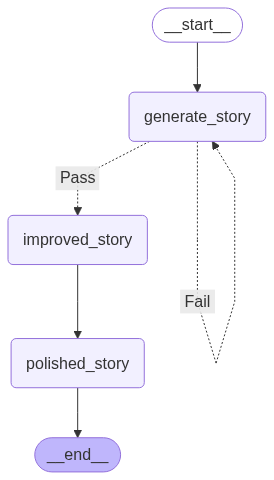

In [24]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
from pprint import pprint

In [ ]:
#new state value will only be updated or replaced that value has some thing new
graph.invoke(State(topic="write about cats"))

state is {'topic': 'write about cats'}
state is {'topic': 'write about cats', 'story': 'On a sunny hill, two kittens frolic with joy. Soft purrs echo, whiskers twitch in delight. Fur gleams under bright light, eyes full of wonder. Benevolent, they bound, capturing moments of bliss.'}
state is {'topic': 'write about cats', 'story': 'In a small town, two furry pets lurked. Both loved to climb, curl up, or simply lounge. They purred softly, bringing joy, while never needing much to be content. These feline wonders ruled their world, living blissfully.'}
state is {'topic': 'write about cats', 'story': 'Tiny feline leaps, exploring rooms with silent steps. Soft fur, curious nose, bright eyes seeking mischief. With gentle purrs, it brings comfort to its keeper.'}
state is {'topic': 'write about cats', 'story': "In a quiet corner, by moonlight's glow, two kittens pranced through gardens. Their tiny paws tread softly, exploring the world with curious eyes. Night's whispers told them secrets wh

{'topic': 'write about cats',
 'story': 'Tiny feline frolics in moonlight, soft purrs echo. Whispering breeze meets silky fur, glowing eyes greet the night. Gentle strides upon rooftops, forever seeking mystery.',
 'improved_story': "Under the pale glow of the moon, a tiny feline embarks on its nightly adventure. Soft purrs resonate like a comforting melody, blending seamlessly with the whispering breeze. This gentle wind weaves through its silky fur, creating a dance of shadows and whispers in the cool night air. \n\nThe cat's eyes, glowing with a curious intelligence, scan the darkness, greeting the mysterious world that awakens beneath the stars. With graceful strides, it leaps effortlessly from rooftop to rooftop, as if tracing an ancient path across the sleeping town.\n\nEver in pursuit of the unknown, the feline explores the hidden corners and forgotten nooks, where secrets lay cradled in the silence of the night. In this enchanting realm of silver light and shadow, the cat is bo